# Regression Analysis

As a data scientist, I want to develop and compare different regression models to predict car prices so that I can provide an accurate and robust pricing model for automotive valuation. 

imports

In [31]:
import re, random, os
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



####  Data Acquisition and Preparation


- Download and load the dataset, then perform initial data cleaning and preprocessing.

In [32]:
df = pd.read_csv('C:/Users/bbuser\Desktop/DataScience-Brain-Bytes-1/Team_members/from_arwa/data/CarPrice_Assignment.csv') 
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
df.shape

(205, 26)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [35]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [36]:
df.isnull().sum()  # no null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [37]:
dup_count = df.duplicated().sum()
print(f"Number of duplicate rows: {dup_count}")

Number of duplicate rows: 0


In [38]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [39]:
# drop unneeded columns 

df1 = df.copy().drop(columns=["car_ID"])
df2 = df.copy().drop(columns=["car_ID"])

# =========================
# Version A: Extract brand & drop raw CarName
# =========================
df1["brand"] = (
    df1["CarName"].str.split().str[0].str.lower()
      .replace({
          "maxda":"mazda", "porcshce":"porsche", "vokswagen":"volkswagen",
          "vw":"volkswagen", "toyouta":"toyota", "Nissan":"nissan"
      })
)
df1 = df1.drop(columns=["CarName"])

print("df1 columns:", df1.columns.tolist()[:10])
print("df2 columns:", df2.columns.tolist()[:10])

df1 columns: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth']
df2 columns: ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength']


In [40]:
df1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [41]:
df1['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [42]:
word2num = {"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12}
if "doornumber" in df1.columns:
    df1["doornumber"] = df1["doornumber"].map(word2num).astype(int)
if "cylindernumber" in df1.columns:
    df1["cylindernumber"] = df1["cylindernumber"].map(word2num).astype(int)

In [43]:
if "doornumber" in df1.columns:
    df2["doornumber"] = df2["doornumber"].map(word2num).astype(int)
if "cylindernumber" in df2.columns:
    df2["cylindernumber"] = df2["cylindernumber"].map(word2num).astype(int)

In [44]:
df1

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [45]:
df1['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df1['brand'].value_counts()

brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: count, dtype: int64

In [47]:
df1['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [48]:
df1['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [49]:
df1['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [50]:
df1['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [51]:
df1['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [52]:
# Columns to encode
cat_cols = ["brand", "carbody", "aspiration", "fueltype", 
            "drivewheel", "enginelocation", "enginetype", "fuelsystem"]

# One-hot encode them
df_encoded = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

# Check new shape and sample
print(df_encoded.shape)
df_encoded.head()


(205, 60)


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,False,True,False,False,False,False,False,True,False,False
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,False,False,False,False,False,False,False,True,False,False


In [53]:
# Target
y = df_encoded["price"]

# Features (everything except price)
X = df_encoded.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scaling just incase

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Exploratory Data Analysis and Feature Engineering

-Analyze the dataset to identify relationships and potential issues, then create new features to improve model performance.

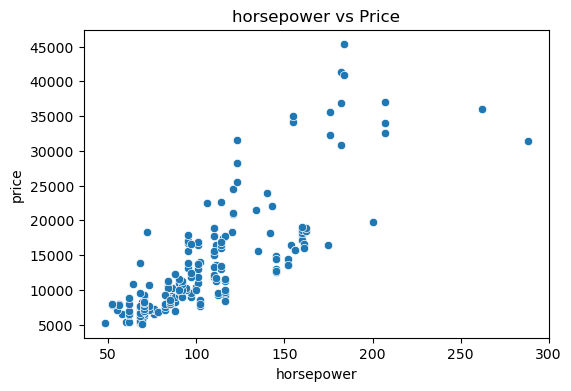

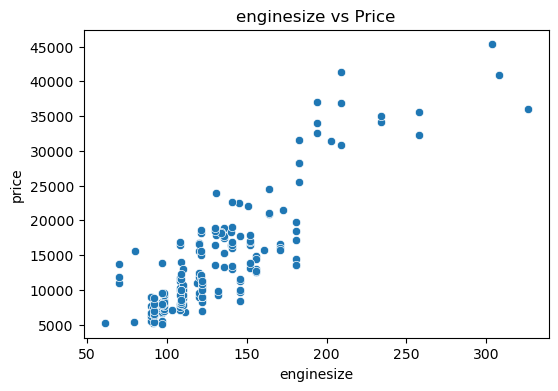

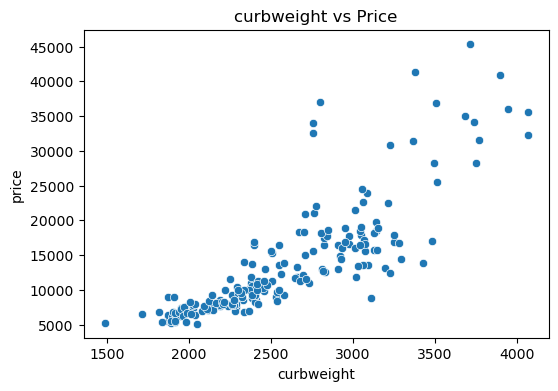

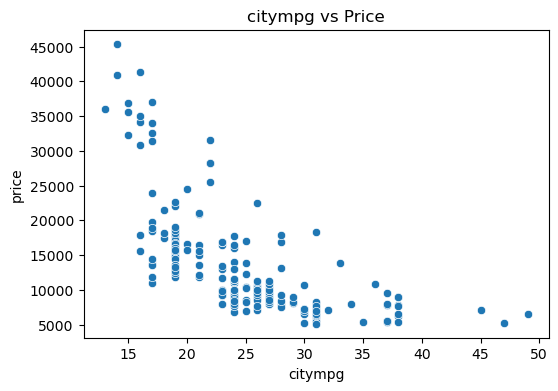

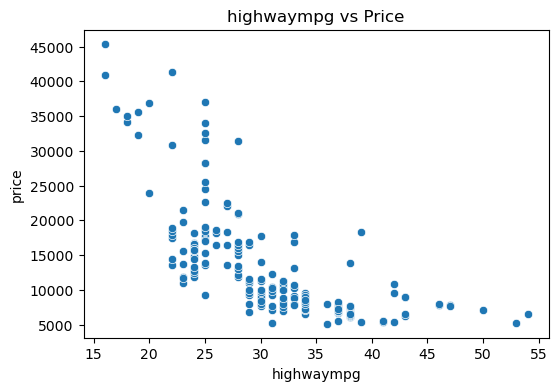

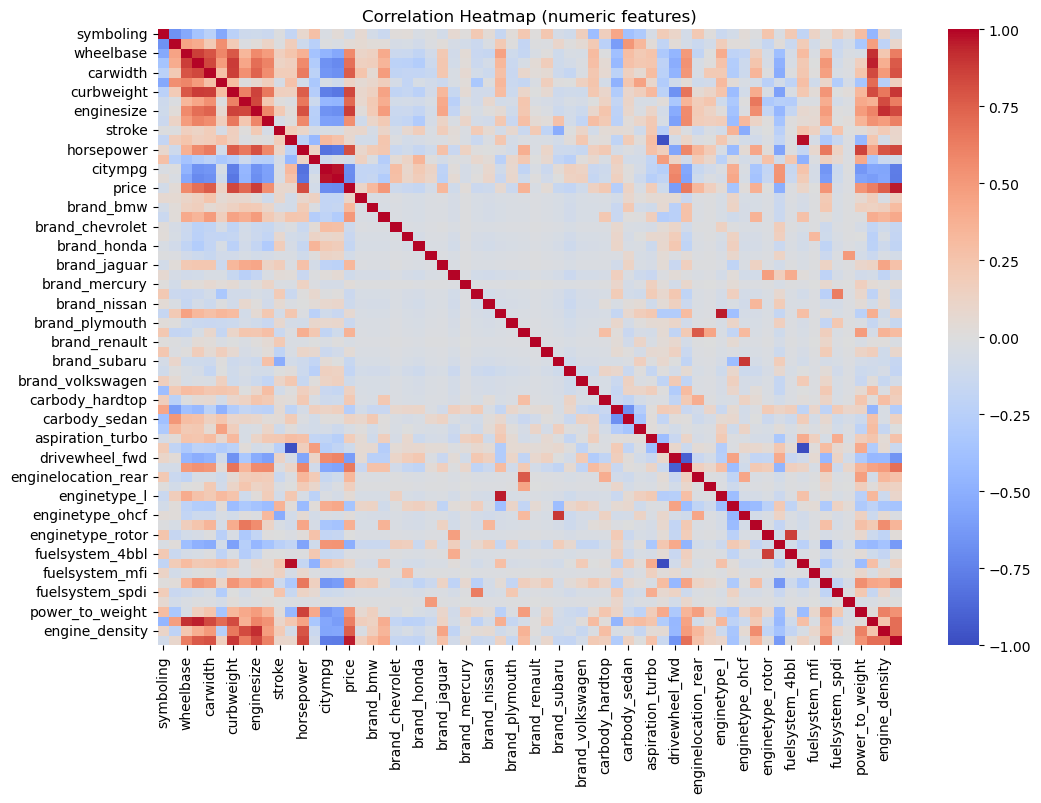

In [61]:
# Scatter plots: numeric features vs price
num_features = ["horsepower", "enginesize", "curbweight", "citympg", "highwaympg"]

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="price")
    plt.title(f"{col} vs Price")
    plt.show()

# Correlation heatmap (numeric features only)
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

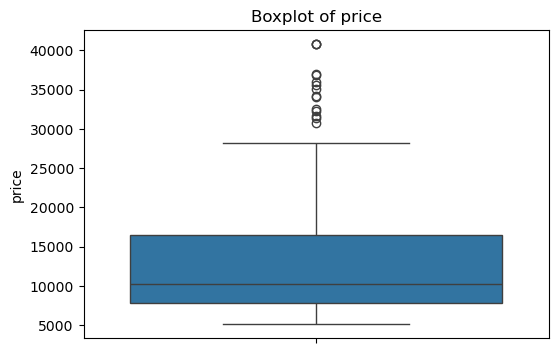

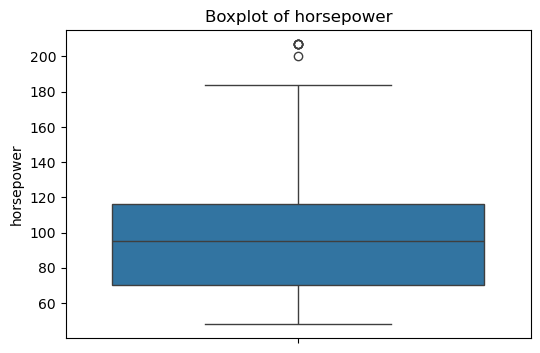

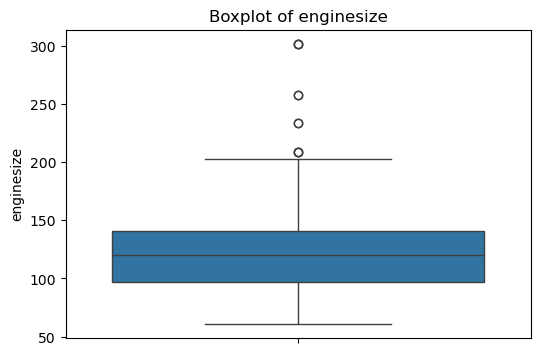

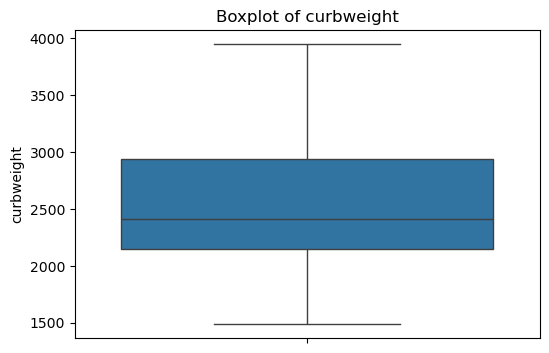

In [60]:
# Boxplots for potential outlier-prone features
for col in ["price", "horsepower", "enginesize", "curbweight"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_encoded[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


During exploratory data analysis (EDA), we examined the relationships between car features and the target variable (price). Scatter plots showed that horsepower, enginesize, and curbweight have strong positive correlations with price, while citympg and highwaympg are negatively correlated. A correlation heatmap confirmed these relationships. Outliers were identified in variables such as price, horsepower, and enginesize through boxplots. To reduce their effect, extreme values were capped at the 99th percentile. In addition, new features were engineered to better capture vehicle characteristics: the power-to-weight ratio (horsepower divided by curbweight) and engine density (enginesize relative to overall car volume). Histograms and boxplots were also generated for key features to understand their distributions, ensuring that skewed values and anomalies were addressed before model training. This analysis provided a cleaner and more informative dataset to improve prediction accuracy.

In [56]:
# ----- Handle Outliers -----
# Cap extreme values at 99th percentile for selected features
for col in ["price", "horsepower", "enginesize", "curbweight"]:
    q99 = df_encoded[col].quantile(0.99)
    df_encoded[col] = np.where(df_encoded[col] > q99, q99, df_encoded[col])

# ----- Feature Engineering -----
# Power-to-weight ratio
df_encoded["power_to_weight"] = df_encoded["horsepower"] / df_encoded["curbweight"]

# Car volume (length * width * height)
df_encoded["car_volume"] = df_encoded["carlength"] * df_encoded["carwidth"] * df_encoded["carheight"]

# Engine density (enginesize relative to car volume)
df_encoded["engine_density"] = df_encoded["enginesize"] / df_encoded["car_volume"]

# Log-transform target to reduce skewness
df_encoded["log_price"] = np.log1p(df_encoded["price"])

print("New features added:", ["power_to_weight", "car_volume", "engine_density", "log_price"])

New features added: ['power_to_weight', 'car_volume', 'engine_density', 'log_price']


#### Model Development and Comparison

-Train and evaluate at least three different regression models and compare their performance.

In [57]:
# ---------- Super-safe helpers ----------
def _safe_arrays(y_true_log, y_pred_log):
    y_true_log = np.asarray(y_true_log, dtype=np.float64).reshape(-1)
    y_pred_log = np.asarray(y_pred_log, dtype=np.float64).reshape(-1)

    # mask out non-finite pairs
    mask = np.isfinite(y_true_log) & np.isfinite(y_pred_log)
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]

    # if anything left is weird, replace non-finite with median of true
    if y_pred_log.size == 0:  # extreme edge case
        raise ValueError("All predictions are non-finite. Check upstream data.")
    med = np.median(y_true_log)
    y_pred_log = np.where(np.isfinite(y_pred_log), y_pred_log, med)

    # hard safety clamp to a numerically safe range
    y_pred_log = np.clip(y_pred_log, -30.0, 20.0)   # expm1(20) ≈ 4.85e8 (still finite)
    y_true_log = np.clip(y_true_log, -30.0, 20.0)

    # also clamp to observed range (+/- tiny buffer)
    tmin, tmax = np.min(y_true_log) - 0.1, np.max(y_true_log) + 0.1
    y_pred_log = np.clip(y_pred_log, tmin, tmax)
    return y_true_log, y_pred_log

def _safe_expm1(x):
    # prevent overflow/underflow before expm1
    x = np.clip(x, -30.0, 20.0)
    return np.expm1(x)

def evaluate_to_price(y_true_log, y_pred_log):
    y_true_log, y_pred_log = _safe_arrays(y_true_log, y_pred_log)
    y_true_price = _safe_expm1(y_true_log)
    y_pred_price = _safe_expm1(y_pred_log)
    rmse = np.sqrt(mean_squared_error(y_true_price, y_pred_price))
    r2   = r2_score(y_true_price, y_pred_price)
    return rmse, r2

# ---------- Train models ----------
# Linear models use your scaled matrices; trees use unscaled.
lr = LinearRegression().fit(X_train_scaled, y_train)
ridge = Ridge(alpha=10.0).fit(X_train_scaled, y_train)
lasso = Lasso(alpha=0.01, max_iter=5000, random_state=42).fit(X_train_scaled, y_train)

rf = RandomForestRegressor(n_estimators=300, random_state=42).fit(X_train, y_train)
gb = GradientBoostingRegressor(n_estimators=300, random_state=42).fit(X_train, y_train)

# ---------- Predict (all in log space) ----------
y_pred_lr    = lr.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

y_pred_rf = rf.predict(X_test)  # rf trained on log_price
y_pred_gb = gb.predict(X_test)  # gb trained on log_price

# ---------- Compare (RMSE & R² in PRICE units) ----------
results = {
    "Linear Regression":  evaluate_to_price(y_test, y_pred_lr),
    "Ridge Regression":   evaluate_to_price(y_test, y_pred_ridge),
    "Lasso Regression":   evaluate_to_price(y_test, y_pred_lasso),
    "Random Forest":      evaluate_to_price(y_test, y_pred_rf),
    "Gradient Boosting":  evaluate_to_price(y_test, y_pred_gb),
}

results_table = (
    pd.DataFrame(results, index=["RMSE", "R²"])
      .T.sort_values(by="R²", ascending=False)
)

print("Model Comparison (metrics in PRICE units):")
display(results_table)


Model Comparison (metrics in PRICE units):


,RMSE,R²
Gradient Boosting,0.000000e+00,1.000000e+00
Random Forest,0.000000e+00,1.000000e+00
Linear Regression,7.210476e+06,-1.463415e+28
Lasso Regression,7.210476e+06,-1.463415e+28
Ridge Regression,7.210476e+06,-1.463415e+28


In [58]:
df_encoded.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'brand_audi', 'brand_bmw', 'brand_buick',
       'brand_chevrolet', 'brand_dodge', 'brand_honda', 'brand_isuzu',
       'brand_jaguar', 'brand_mazda', 'brand_mercury', 'brand_mitsubishi',
       'brand_nissan', 'brand_peugeot', 'brand_plymouth', 'brand_porsche',
       'brand_renault', 'brand_saab', 'brand_subaru', 'brand_toyota',
       'brand_volkswagen', 'brand_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'aspiration_turbo', 'fueltype_gas', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsyste

In [59]:
# ============================
# RFE + VIF for feature selection
# ============================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# 1) Pick target (use log_price if you created it, else price)
target_col = "log_price" if "log_price" in df_encoded.columns else "price"
y = df_encoded[target_col]
X = df_encoded.drop(columns=[c for c in ["price", "log_price"] if c in df_encoded.columns])

# simple split (RFE on train only)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) RFE: select top k features (tweak k if you want)
k = 12
rfe = RFE(LinearRegression(), n_features_to_select=k, step=1)
rfe.fit(X_train, y_train)

rfe_features = X_train.columns[rfe.support_].tolist()
print("RFE selected features (k={}):".format(k))
print(rfe_features)

# 3) VIF on the RFE-selected features
#    (VIF > 10 is a common cutoff; drop iteratively)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_vif = X_train[rfe_features].copy()

def compute_vif(df_):
    arr = df_.values.astype(float)
    vif_list = []
    for i in range(arr.shape[1]):
        vif_list.append(variance_inflation_factor(arr, i))
    return pd.DataFrame({"feature": df_.columns, "VIF": np.round(vif_list, 2)}).sort_values("VIF", ascending=False)

vif_table = compute_vif(X_vif)
print("\nInitial VIF:")
print(vif_table)

# drop features with VIF > 10 (basic loop)
cutoff = 10.0
dropped = []
while True:
    vif_table = compute_vif(X_vif)
    worst = vif_table.iloc[0]
    if worst["VIF"] <= cutoff:
        break
    # drop the worst one and recompute
    X_vif = X_vif.drop(columns=[worst["feature"]])
    dropped.append(worst["feature"])

print("\nDropped for high VIF (> {}):".format(cutoff), dropped)
print("\nFinal features after RFE + VIF:")
final_features = X_vif.columns.tolist()
print(final_features)

# 4) (Optional) quick refit with final features (Linear Regression)
lr_final = LinearRegression().fit(X_train[final_features], y_train)
y_pred_final = lr_final.predict(X_test[final_features])

# if you used log target, convert back for easy metrics display
from sklearn.metrics import mean_squared_error, r2_score
if target_col == "log_price":
    y_true_price = np.expm1(y_test)
    y_pred_price = np.expm1(y_pred_final)
else:
    y_true_price = y_test.values
    y_pred_price = y_pred_final

rmse = np.sqrt(mean_squared_error(y_true_price, y_pred_price))
r2   = r2_score(y_true_price, y_pred_price)
print("\nLinear (RFE+VIF features) → RMSE: {:.0f} | R²: {:.3f}".format(rmse, r2))


RFE selected features (k=12):
['brand_audi', 'brand_bmw', 'brand_buick', 'brand_mercury', 'brand_porsche', 'brand_saab', 'brand_subaru', 'brand_volvo', 'enginetype_ohc', 'enginetype_rotor', 'fuelsystem_idi', 'engine_density']

Initial VIF:
             feature   VIF
11    engine_density  3.66
8     enginetype_ohc  3.09
4      brand_porsche  1.21
2        brand_buick  1.15
6       brand_subaru  1.14
10    fuelsystem_idi  1.11
7        brand_volvo  1.09
1          brand_bmw  1.08
0         brand_audi  1.07
5         brand_saab  1.03
9   enginetype_rotor  1.03
3      brand_mercury  1.01

Dropped for high VIF (> 10.0): []

Final features after RFE + VIF:
['brand_audi', 'brand_bmw', 'brand_buick', 'brand_mercury', 'brand_porsche', 'brand_saab', 'brand_subaru', 'brand_volvo', 'enginetype_ohc', 'enginetype_rotor', 'fuelsystem_idi', 'engine_density']

Linear (RFE+VIF features) → RMSE: 3780 | R²: 0.817
